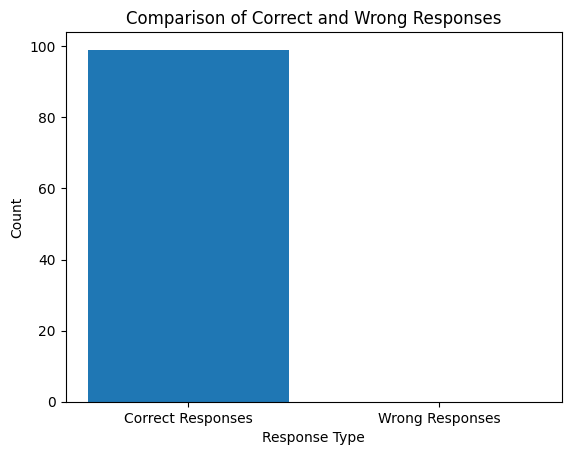

-----------------------------------------------------------
Correct Responses: 99
-----------------------------------------------------------
Wrong Responses: 0
-----------------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose other models if needed

def compare_sentences(sentence1, sentence2, threshold=0.70):
    # Encode the sentences using Sentence Transformer
    embedding1 = model.encode(sentence1, convert_to_tensor=True)
    embedding2 = model.encode(sentence2, convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.cos_sim(embedding1, embedding2).item()

    # Determine if the response is correct or wrong
    if similarity >= threshold:
        return "Correct Response"
    else:
        return "Wrong Response"

# Load the CSV file
file_path = '/content/Questions_and_Intents_Possible_Data_Loss.csv'
data = pd.read_csv(file_path)

# Initialize counters
correct_count = 0
wrong_count = 0

# Compare sentences in the two columns for each row
for index, row in data.iterrows():
    response = compare_sentences(str(row['Response']), str(row['Response_Expected']))  # Convert to strings to avoid errors
    if response == "Correct Response":
        correct_count += 1
    else:
        wrong_count += 1

# Plot the results
labels = ['Correct Responses', 'Wrong Responses']
counts = [correct_count, wrong_count]

plt.bar(labels, counts)
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.title('Comparison of Correct and Wrong Responses')
plt.show()

print('-'*59)
print(f"Correct Responses: {correct_count}")
print('-'*59)
print(f"Wrong Responses: {wrong_count}")
print('-'*59)


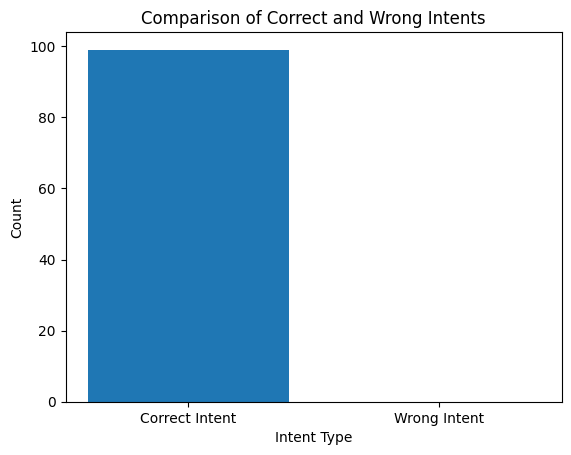

-----------------------------------------------------------
Correct Intent: 99
-----------------------------------------------------------
Wrong Intent: 0
-----------------------------------------------------------


In [ ]:

def compare_sentences(sentence1, sentence2, threshold = 1.00):
    # Encode the sentences using Sentence Transformer
    embedding1 = model.encode(sentence1, convert_to_tensor=True)
    embedding2 = model.encode(sentence2, convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.cos_sim(embedding1, embedding2).item()

    # Determine if the intent is correct or wrong
    if similarity >= threshold:
        return "Correct Intent"
    else:
        return "Wrong Intent"

# Load the CSV file
file_path = '/content/Questions_and_Intents_Possible_Data_Loss.csv'
data = pd.read_csv(file_path)

# Initialize counters
correct_intent_count = 0
wrong_intent_count = 0

# Compare sentences in the two specified columns for each row
for index, row in data.iterrows():
    response = compare_sentences(str(row['Known_Intent']), str(row['Intent']))  # Replace 'Response' and 'Response_Expected' with your actual column names
    if response == "Correct Intent":
        correct_intent_count += 1
    else:
        wrong_intent_count += 1

# Plot the results
labels = ['Correct Intent', 'Wrong Intent']
counts = [correct_intent_count, wrong_intent_count]

plt.bar(labels, counts)
plt.xlabel('Intent Type')
plt.ylabel('Count')
plt.title('Comparison of Correct and Wrong Intents')
plt.show()

print('-'*59)
print(f"Correct Intent: {correct_intent_count}")
print('-'*59)
print(f"Wrong Intent: {wrong_intent_count}")
print('-'*59)


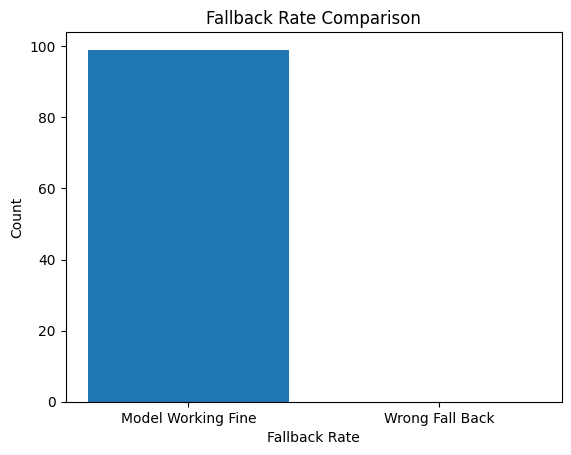

-----------------------------------------------------------
Model Working Fine: 99
-----------------------------------------------------------
Wrong Fall Back: 0
-----------------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def check_fallback_rate(fallback_value):
    # If the fallback rate is False, the model is working fine
    if not fallback_value:
        return "Model Working Fine"
    else:
        return "Wrong Response"

# Load the CSV file
file_path = '/content/Questions_and_Intents_Possible_Data_Loss.csv'
data = pd.read_csv(file_path)

# Initialize counters
model_working_fine_count = 0
wrong_response_count = 0

# Check fallback rates for each row
for index, row in data.iterrows():
    # Check fallback rate
    fallback_response = check_fallback_rate(row['Fallback_rate'])  # Replace 'Fallback_Rate' with your actual column name for fallback
    if fallback_response == "Model Working Fine":
        model_working_fine_count += 1
    else:
        wrong_response_count += 1

# Plot the fallback rate results
labels_fallback = ['Model Working Fine', 'Wrong Fall Back']
counts_fallback = [model_working_fine_count, wrong_response_count]

plt.bar(labels_fallback, counts_fallback)
plt.xlabel('Fallback Rate')
plt.ylabel('Count')
plt.title('Fallback Rate Comparison')
plt.show()

print('-'*59)
print(f"Model Working Fine: {model_working_fine_count}")
print('-'*59)
print(f"Wrong Fall Back: {wrong_response_count}")
print('-'*59)


In [ ]:

# Calculate the average latency
average_latency = data['webhook_latency'].mean()  # Replace 'webhook_latency' with the actual column name if different

print('-'*59)
print(f"Average Latency: {average_latency} ms")
print('-'*59)


-----------------------------------------------------------
Average Latency: 219.67676767676767 ms
-----------------------------------------------------------


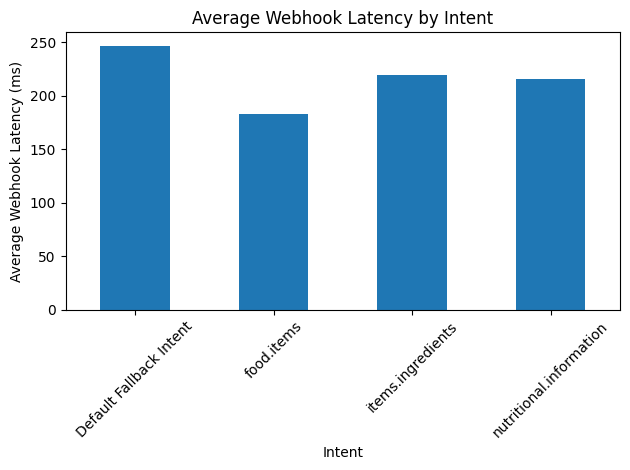

Intent
Default Fallback Intent    246.933333
food.items                 182.600000
items.ingredients          219.409091
nutritional.information    215.859649
Name: webhook_latency, dtype: float64


In [ ]:

# Group by intent and calculate the average webhook_latency
average_latency_by_intent = data.groupby('Intent')['webhook_latency'].mean()  # Replace 'Intent' with the correct column name if different

# Plot the average latency for each intent
average_latency_by_intent.plot(kind='bar')
plt.xlabel('Intent')
plt.ylabel('Average Webhook Latency (ms)')
plt.title('Average Webhook Latency by Intent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(average_latency_by_intent)
